In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load dataset
file_dataset = "input/credit_score.csv"
data = pd.read_csv(file_dataset, encoding = "latin-1")
feature_names = {
    "Age": "age",
    "Gender": "sex",
    "Income": "income",
    "Education": "educ",
    "Marital Status": "married",
    "Number of Children": "child",
    "Home Ownership": "house",
    "Credit Score": "score"}
data = data.rename(columns = feature_names)

In [3]:
# Print columns with names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      164 non-null    int64 
 1   sex      164 non-null    object
 2   income   164 non-null    int64 
 3   educ     164 non-null    object
 4   married  164 non-null    object
 5   child    164 non-null    int64 
 6   house    164 non-null    object
 7   score    164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [4]:
# Print dataset size
f"{data.shape[0]} rows X {data.shape[1]} columns = {data.size} cells"

'164 rows X 8 columns = 1312 cells'

In [5]:
# Check if dataset contains gaps (empty cells / null values)
data.isnull().sum()

age        0
sex        0
income     0
educ       0
married    0
child      0
house      0
score      0
dtype: int64

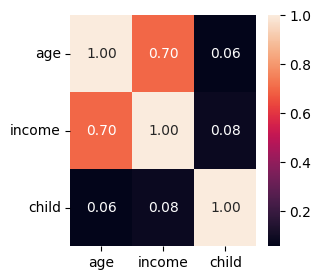

In [6]:
# Heatmap (only for numerical features)
corr = data.corr()
fig, ax = plt.subplots(figsize = (3, 3))
sns.heatmap(corr, annot = True, fmt = ".2f")
plt.yticks(rotation = 0)
plt.show()

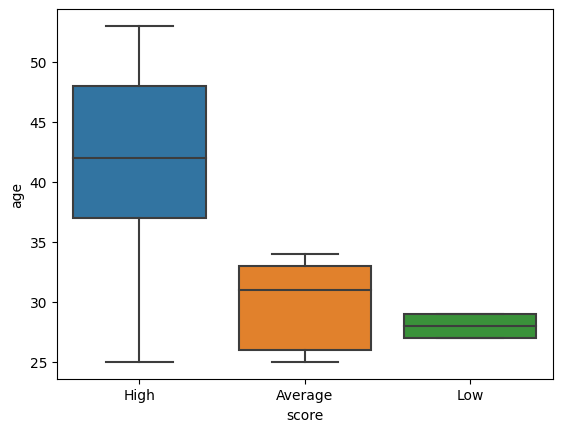

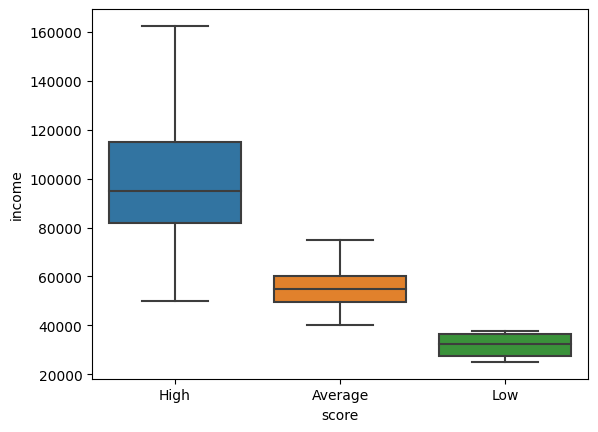

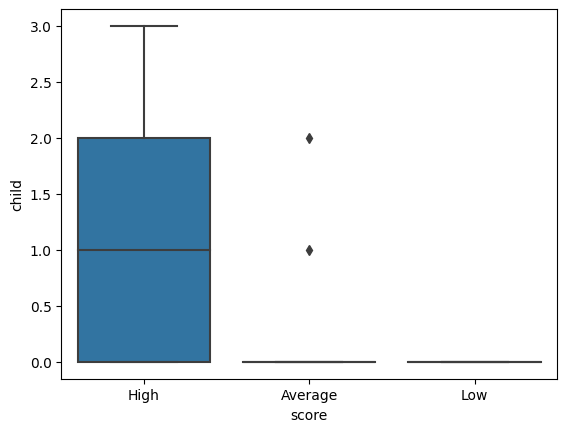

In [7]:
# Boxplots
feature_names = ["age", "income", "child"]
for feature_name in feature_names:
    figure = plt.figure()
    ax = sns.boxplot(x = "score", y = feature_name, data = data)

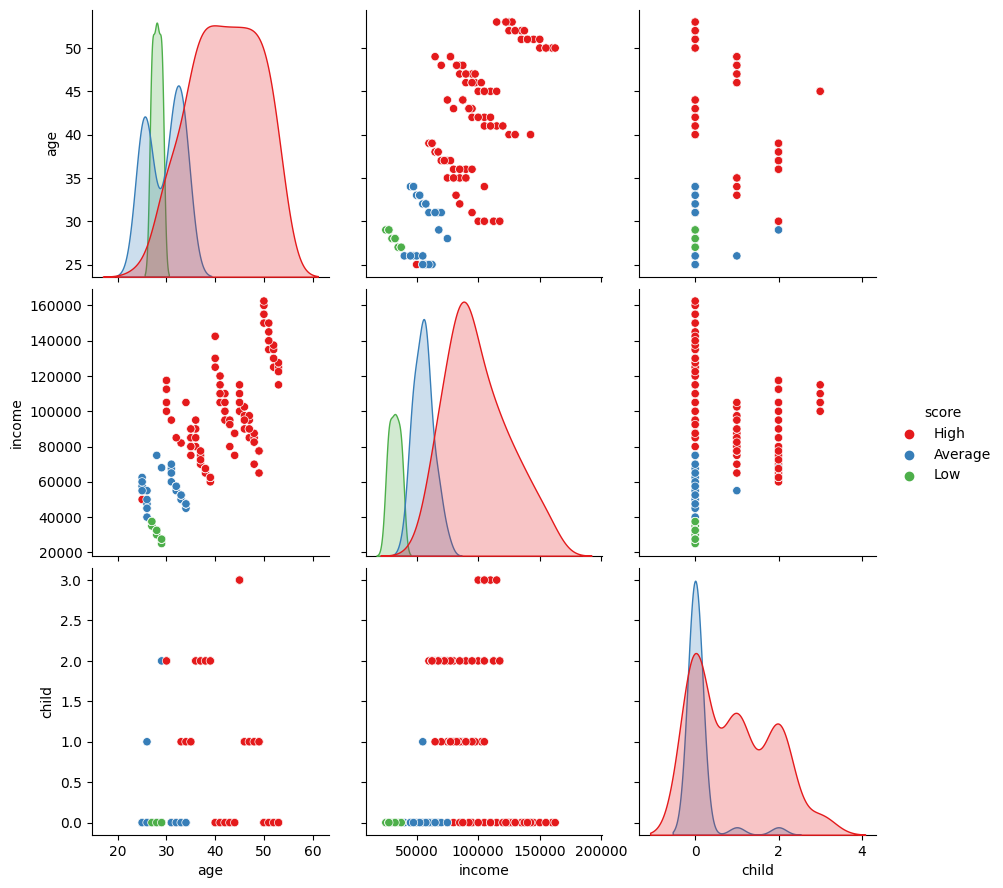

In [8]:
# Pairplot
sns.pairplot(data, hue = "score", palette = "Set1", height = 3)

In [9]:
# Split dataset into training set and test set
X = data.drop("score", axis = 1)
y = data["score"]  # Target that we want to predict
# Use random_state to produce the same train/test split each time it’s run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [10]:
# NORMALIZE DATA
# Do ordinal encoding for target
unique_vals = data["score"].unique()
print(f"Unique vals in 'score' col: {unique_vals}")
oe = OrdinalEncoder(categories = [["Low", "Average", "High"]], dtype = np.int32)
y_train = oe.fit_transform(y_train.values.reshape(-1, 1))
y_test = oe.transform(y_test.values.reshape(-1, 1))

# Do label encoding for all categorical (nominal) features
le = LabelEncoder()
object_cols = X_train.select_dtypes(include = ["object"]).columns.tolist()
for col in object_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Do minmax for all numerical features
scaler = MinMaxScaler()
num_cols = X_train.select_dtypes(include = [np.number]).columns.tolist()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Unique vals in 'score' col: ['High' 'Average' 'Low']


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      0.88      0.88         8
           2       0.95      0.95      0.95        22

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33

[[ 3  0  0]
 [ 0  7  1]
 [ 0  1 21]]


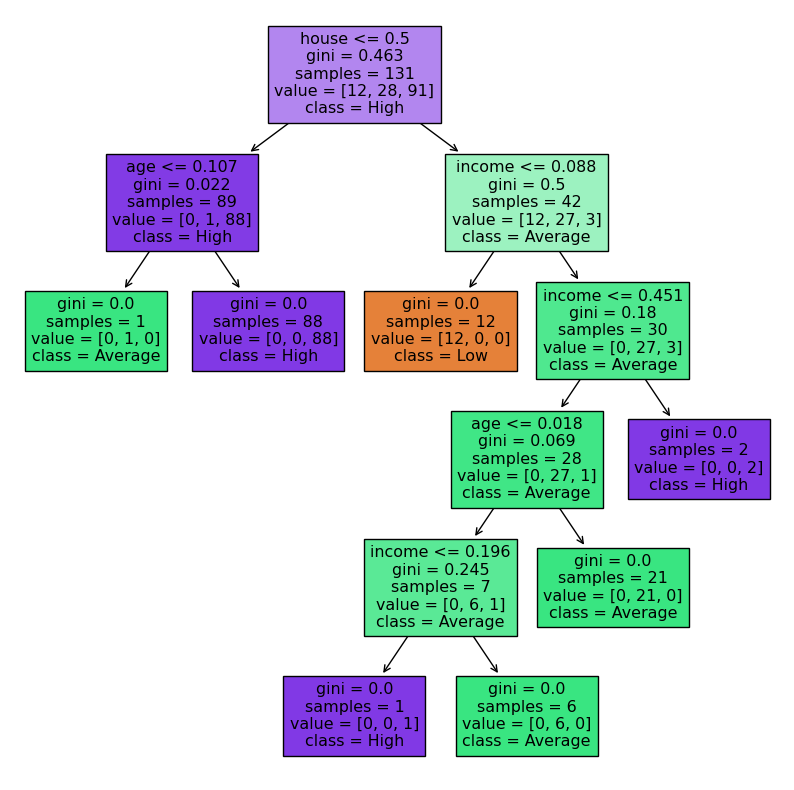

In [11]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Precision (точність) = TP / (TP + FP)
# Recall (повнота)     = TP / (TP + FN)
# f1-score = 2 / (1 / Precision + 1 / Recall)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualization
plt.figure(figsize = (10, 10))
plot_tree(model,
          feature_names = X_train.columns,
          class_names = ["Low", "Average", "High"],
          filled = True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.88      0.93         8
           2       0.96      1.00      0.98        22

    accuracy                           0.97        33
   macro avg       0.99      0.96      0.97        33
weighted avg       0.97      0.97      0.97        33

[[ 3  0  0]
 [ 0  7  1]
 [ 0  0 22]]


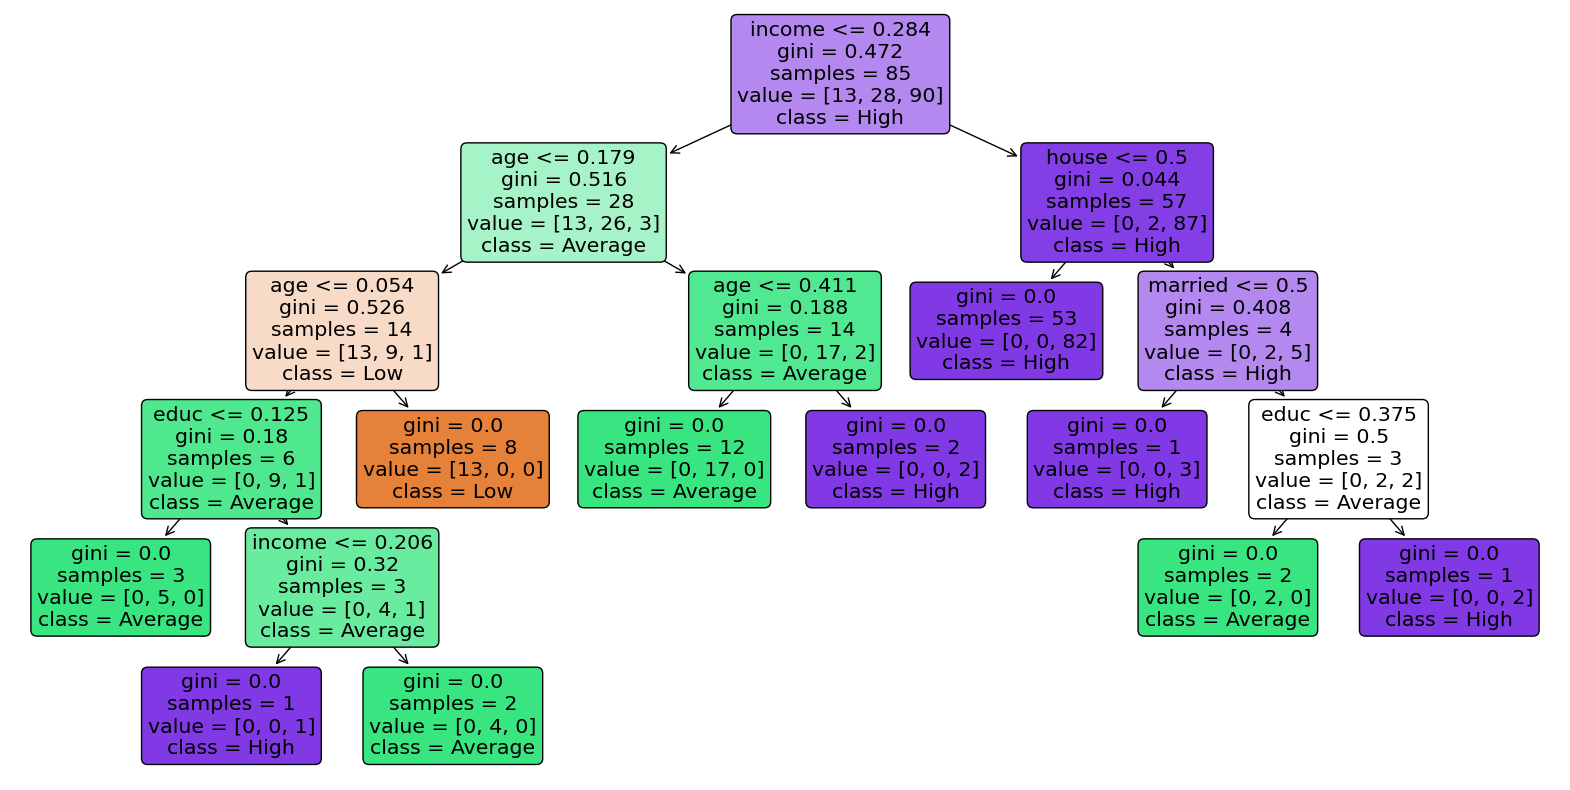

In [12]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# For Random Forest, each "estimator" is a decision tree.
# n_estimators tells the model how many individual decision trees to build.
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualization
plt.figure(figsize = (20, 10))
plot_tree(model.estimators_[7],
          feature_names = X_train.columns,
          class_names = ["Low", "Average", "High"],
          filled = True,
          rounded = True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        22

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

[[ 3  0  0]
 [ 0  8  0]
 [ 0  0 22]]


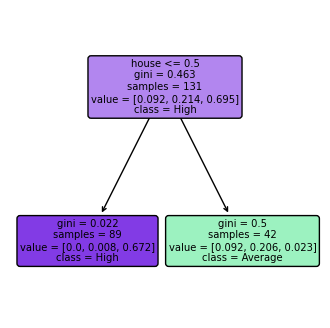

In [13]:
# ADABOOST
from sklearn.ensemble import AdaBoostClassifier

# For AdaBoost, each "estimator" is a weak learner.
# n_estimators  tells the model how many weak learners to train iteratively.
model = AdaBoostClassifier(n_estimators = 70)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualization
plt.figure(figsize = (4, 4))
plot_tree(model.estimators_[0],
          feature_names = X_train.columns,
          class_names = ["Low", "Average", "High"],
          filled = True,
          rounded = True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.78      0.88      0.82         8
           2       0.95      0.95      0.95        22

    accuracy                           0.91        33
   macro avg       0.91      0.83      0.86        33
weighted avg       0.92      0.91      0.91        33

[[ 2  1  0]
 [ 0  7  1]
 [ 0  1 21]]


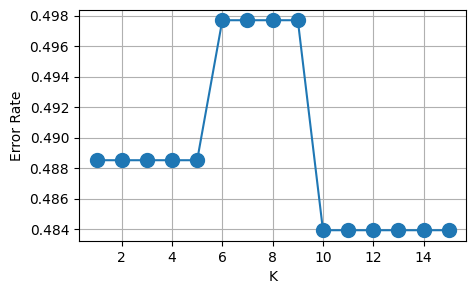

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Choosing a K Value
error_rate = []
max_neighbors = 16
for i in range(1, max_neighbors):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train.ravel())
    pred_y = model.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

plt.figure(figsize = (5, 3))
plt.plot(range(1, max_neighbors), error_rate, marker = 'o', markersize = 10)
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()

In [15]:
# SVM
from sklearn.svm import SVC

model = SVC(C = 1.0, gamma = 1.0, kernel = "rbf")
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Gridsearch for C and gamma
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001], "kernel": ["rbf"]}
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train, y_train.ravel())
grid_predictions = grid.predict(X_test)

print(f"\n\nBest parameters: {grid.best_params_}")
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.78      0.88      0.82         8
           2       0.95      0.95      0.95        22

    accuracy                           0.91        33
   macro avg       0.91      0.83      0.86        33
weighted avg       0.92      0.91      0.91        33

[[ 2  1  0]
 [ 0  7  1]
 [ 0  1 21]]


Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.88      0.93         8
           2       0.96      1.00      0.98        22

    accuracy                           0.97        33
   macro avg       0.99      0.96      0.97        33
weighted avg       0.97      0.97      0.97        33

[[ 3  0  0]
 [ 0  7  1]
 [ 0  0 22]]
